In [1]:

from google.colab import drive
drive.mount('/content/gdrive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from string import punctuation
import pickle
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
stop=stopwords.words('english')
MAX_NB_WORDS=50000
EMBEDDING_DIM =300
MAX_SEQUENCE_LENGTH=868
import re
from nltk.stem import WordNetLemmatizer 
from nltk.tokenize import word_tokenize 
lemmatizer=WordNetLemmatizer()
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Model, load_model


In [125]:
with open('/content/gdrive/My Drive/Movie_genre_prediction_dataset/tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)


from keras.models import model_from_json
json_file = open('/content/gdrive/My Drive/Movie_genre_prediction_dataset/model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

loaded_model.load_weights('/content/gdrive/My Drive/Movie_genre_prediction_dataset/base_model_word2vec_lstm.h5')

with open('/content/gdrive/My Drive/Movie_genre_prediction_dataset/mlb_class.pickle', 'rb') as handle:
    pp = pickle.load(handle)

In [126]:
def resize_img(path):
  try:
    img=cv2.imread(path)
    img=cv2.resize(img,(75,115))
    img=img.astype(np.float32)/255
    plt.imshow(img)
    return img
  except Exception as e:
    print(str(e))
    return None

In [127]:
df=pd.read_csv("/content/gdrive/My Drive/Movie_genre_prediction_dataset/train_data.csv")

In [128]:
df['poster_paths'][0]

'/content/gdrive/My Drive/Movie_genre_prediction_dataset/downloaded_posters/Remarkable Power.jpg'

In [129]:
df['overview'][0]

"A late night talk show host masterminds an elaborate scheme to save his canceled show and avenge his wife's affair, entangling an eclectic collection of tinsel towners in the process."

In [130]:
df

,Unnamed: 0,Unnamed: 0.1,original_title,overview,id,genres,genre_list,poster_paths
0,14991,15885,Remarkable Power,A late night talk show host masterminds an ela...,33009,"[{'id': 35, 'name': 'Comedy'}]",['Comedy'],/content/gdrive/My Drive/Movie_genre_predictio...
1,16721,17850,Warrior of the Lost World,A nomad mercenary on a high-tech motorcycle he...,52837,"[{'id': 28, 'name': 'Action'}, {'id': 878, 'na...","['Action', 'Science Fiction']",/content/gdrive/My Drive/Movie_genre_predictio...
2,23070,25339,Grant Morrison: Talking with Gods,"Philosopher, pop-icon, shaman and story teller...",55322,"[{'id': 28, 'name': 'Action'}, {'id': 99, 'nam...","['Action', 'Documentary']",/content/gdrive/My Drive/Movie_genre_predictio...
3,38430,44792,Altitude,A female FBI agent is offered millions to help...,443700,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...","['Action', 'Thriller']",/content/gdrive/My Drive/Movie_genre_predictio...
4,26328,29247,Summer Camp,The director of a failing summer camp decides ...,29819,"[{'id': 35, 'name': 'Comedy'}]",['Comedy'],/content/gdrive/My Drive/Movie_genre_predictio...
...,...,...,...,...,...,...,...,...
28030,8781,9203,Swimming,"Two girl friends in Myrtle Beach, South Caroli...",107942,"[{'id': 18, 'name': 'Drama'}]",['Drama'],/content/gdrive/My Drive/Movie_genre_predictio...
28031,21296,23238,Wake Wood,The parents of a girl who was killed by a sava...,59726,"[{'id': 18, 'name': 'Drama'}, {'id': 27, 'name...","['Drama', 'Horror', 'Thriller']",/content/gdrive/My Drive/Movie_genre_predictio...
28032,570,598,Candyman: Farewell to the Flesh,The Candyman moves on to New Orleans and start...,10824,"[{'id': 27, 'name': 'Horror'}]",['Horror'],/content/gdrive/My Drive/Movie_genre_predictio...
28033,8829,9257,Kabhi Khushi Kabhie Gham,"Orthodox Indian, Raichand, would like his two ...",10757,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...","['Comedy', 'Drama']",/content/gdrive/My Drive/Movie_genre_predictio...


(1, 115, 75, 3)

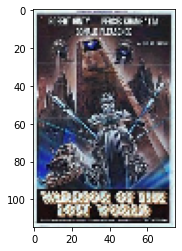

In [190]:
val_imgs=resize_img('/content/gdrive/My Drive/220px-Warriorofthelostworld.jpg')
val_np_imgs = np.array(val_imgs)
val_np_imgs=np.expand_dims(val_np_imgs,axis=0)
val_np_imgs.shape

In [191]:

def clean_text(text):
  text=text.translate(str.maketrans('', '', punctuation))  #   removes all punctuation
  text=text.lower().strip()
  text = ' '.join([i if i not in stop and i.isalpha() else '' for i in text.lower().split()])
  text=' '.join([lemmatizer.lemmatize(w) for w in word_tokenize(text)])
  text=re.sub(r"\s{2,}"," ",text)         #filteration of length
  return text

In [205]:
inp=clean_text('''The Rider gains acceptance from various Marginals (amazons, martial artists, truckers, punks, soldiers, Omega defectors) by winning in the ritual brawl which determines who is the strongest. The Rider and the Outsiders launch their final attack on Prossor's regime, but are intercepted by the Omegas and a giant armored truck, called Megaweapon. As the rebels destroy the Omega patrols with their cars (Ford Taunus TCs), helicopters and tankers, the Rider manages to destroy the Megaweapon by short circuiting it, but not before his speedcycle is crushed under the truck's wheels. The Rider and McWayne storm Prossor's headquarters where they face the dictator and a brainwashed Nastasia. She wounds the Rider, but when ordered to kill her father, she rebels, turning on Prossor and shooting him instead. The Omega has been overthrown, and the Outsiders and Marginals celebrate, as the Rider prepares to move on with his repaired speedcycle..''')

In [206]:
inp

'rider gain acceptance various marginals amazon martial artist trucker punk soldier omega defector winning ritual brawl determines strongest rider outsider launch final attack prossors regime intercepted omega giant armored truck called megaweapon rebel destroy omega patrol car ford taunus tc helicopter tanker rider manages destroy megaweapon short circuiting speedcycle crushed truck wheel rider mcwayne storm prossors headquarters face dictator brainwashed nastasia wound rider ordered kill father rebel turning prossor shooting instead omega overthrown outsider marginals celebrate rider prepares move repaired speedcycle'

In [207]:
X_test=tokenizer.texts_to_sequences(inp)
X_test=pad_sequences(X_test,maxlen=MAX_SEQUENCE_LENGTH)


In [208]:
y_pred=loaded_model.predict([val_np_imgs,X_test])

In [209]:
out=y_pred

In [210]:
pp

array(['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror',
       'Music', 'Mystery', 'Romance', 'Science Fiction', 'Thriller',
       'War', 'Western'], dtype=object)

In [211]:
out

array([[0.16953933, 0.09218735, 0.06723079, 0.18758863, 0.05079812,
        0.08178422, 0.18284354, 0.03490502, 0.12398249, 0.01859084,
        0.52475464, 0.04196599, 0.07878643, 0.02655309, 0.23759863,
        0.24835762, 0.01244091, 0.00823944]], dtype=float32)

In [212]:
y_pred = np.zeros(out.shape)
y_pred[out>0.3]=1
y_pred = np.array(y_pred)

In [213]:
y_pred

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 0.]])

In [214]:
ans=np.array(y_pred[0].astype('int32'))

In [215]:
l=[]
for i,k in enumerate(ans):
  if k==1:
    print(i)
    l.append(pp[i])

10


In [216]:
l

['Horror']